In [1]:
# Import system defined packages and libraries
import os
import warnings
warnings.filterwarnings('ignore')
import sys
from IPython.display import clear_output

In [2]:
# List of common packages to install and import
commonPackages = [
    'numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn']

In [3]:
# Iterate and installing packages
for package in commonPackages:
    try:
        __import__(package)
        print(f"'{package}' is already installed.")
    except ImportError:
        print(f"Installing '{package}'...")
        %pip install {package}
        # Clear output after each installation
        clear_output(wait=True)
        print(f"'{package}' installed successfully.")

'scikit-learn' installed successfully.


In [4]:
# Importing the packages required for analysis
import numpy as np
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
# Downloading latest version
path = kagglehub.dataset_download("amdj3dax/ransomware-detection-data-set")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ransomware-detection-data-set' dataset.
Path to dataset files: /kaggle/input/ransomware-detection-data-set


In [6]:
# Listing files in the downloaded dataset directory
files = os.listdir(path)
csv_file = None
for f in files:
    if f.endswith('.csv'):
        csv_file = f
        break

if csv_file:
    full_csv_path = os.path.join(path, csv_file)
    print(f"Found CSV file: {full_csv_path}")
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(full_csv_path)

Found CSV file: /kaggle/input/ransomware-detection-data-set/data_file.csv


In [7]:
# Display the total rows and columns
df.shape

(62485, 18)

In [8]:
# Display data columns
df.columns

Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')

In [9]:
# Print data's first few lines
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [10]:
# Print dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [11]:
# Checking for missing values
df.isnull().sum()

,0
FileName,0
md5Hash,0
Machine,0
DebugSize,0
DebugRVA,0
MajorImageVersion,0
MajorOSVersion,0
ExportRVA,0
ExportSize,0
IatVRA,0


In [12]:
# Display the summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Machine,62485.0,6756.472657,1.334550e+04,0.0,332.0,332.0,332.0,4.362000e+04
DebugSize,62485.0,25870.477459,6.461396e+06,0.0,0.0,0.0,28.0,1.615155e+09
DebugRVA,62485.0,154161.114027,1.903142e+06,0.0,0.0,0.0,12832.0,2.852127e+08
MajorImageVersion,62485.0,58.785997,1.114068e+03,0.0,0.0,0.0,6.0,6.332500e+04
MajorOSVersion,62485.0,5.417524,2.543697e+00,0.0,4.0,5.0,6.0,2.600000e+02
ExportRVA,62485.0,895318.632616,3.779527e+07,0.0,0.0,0.0,28752.0,2.147484e+09
ExportSize,62485.0,409462.345427,2.851820e+07,0.0,0.0,0.0,104.0,2.415919e+09
IatVRA,62485.0,146631.139634,1.124630e+06,0.0,4096.0,8520.0,65536.0,6.615450e+07
MajorLinkerVersion,62485.0,9.782604,9.047157e+00,0.0,6.0,9.0,11.0,2.550000e+02
MinorLinkerVersion,62485.0,6.613171,1.697646e+01,0.0,0.0,0.0,10.0,2.550000e+02


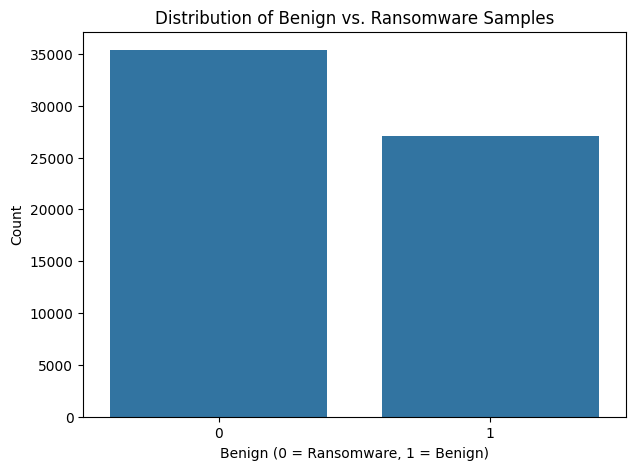

In [13]:
# Plot the distribution of the 'Benign'
plt.figure(figsize=(7, 5))
sns.countplot(x='Benign', data=df)
plt.title('Distribution of Benign vs. Ransomware Samples')
plt.xlabel('Benign (0 = Ransomware, 1 = Benign)')
plt.ylabel('Count')
plt.show()

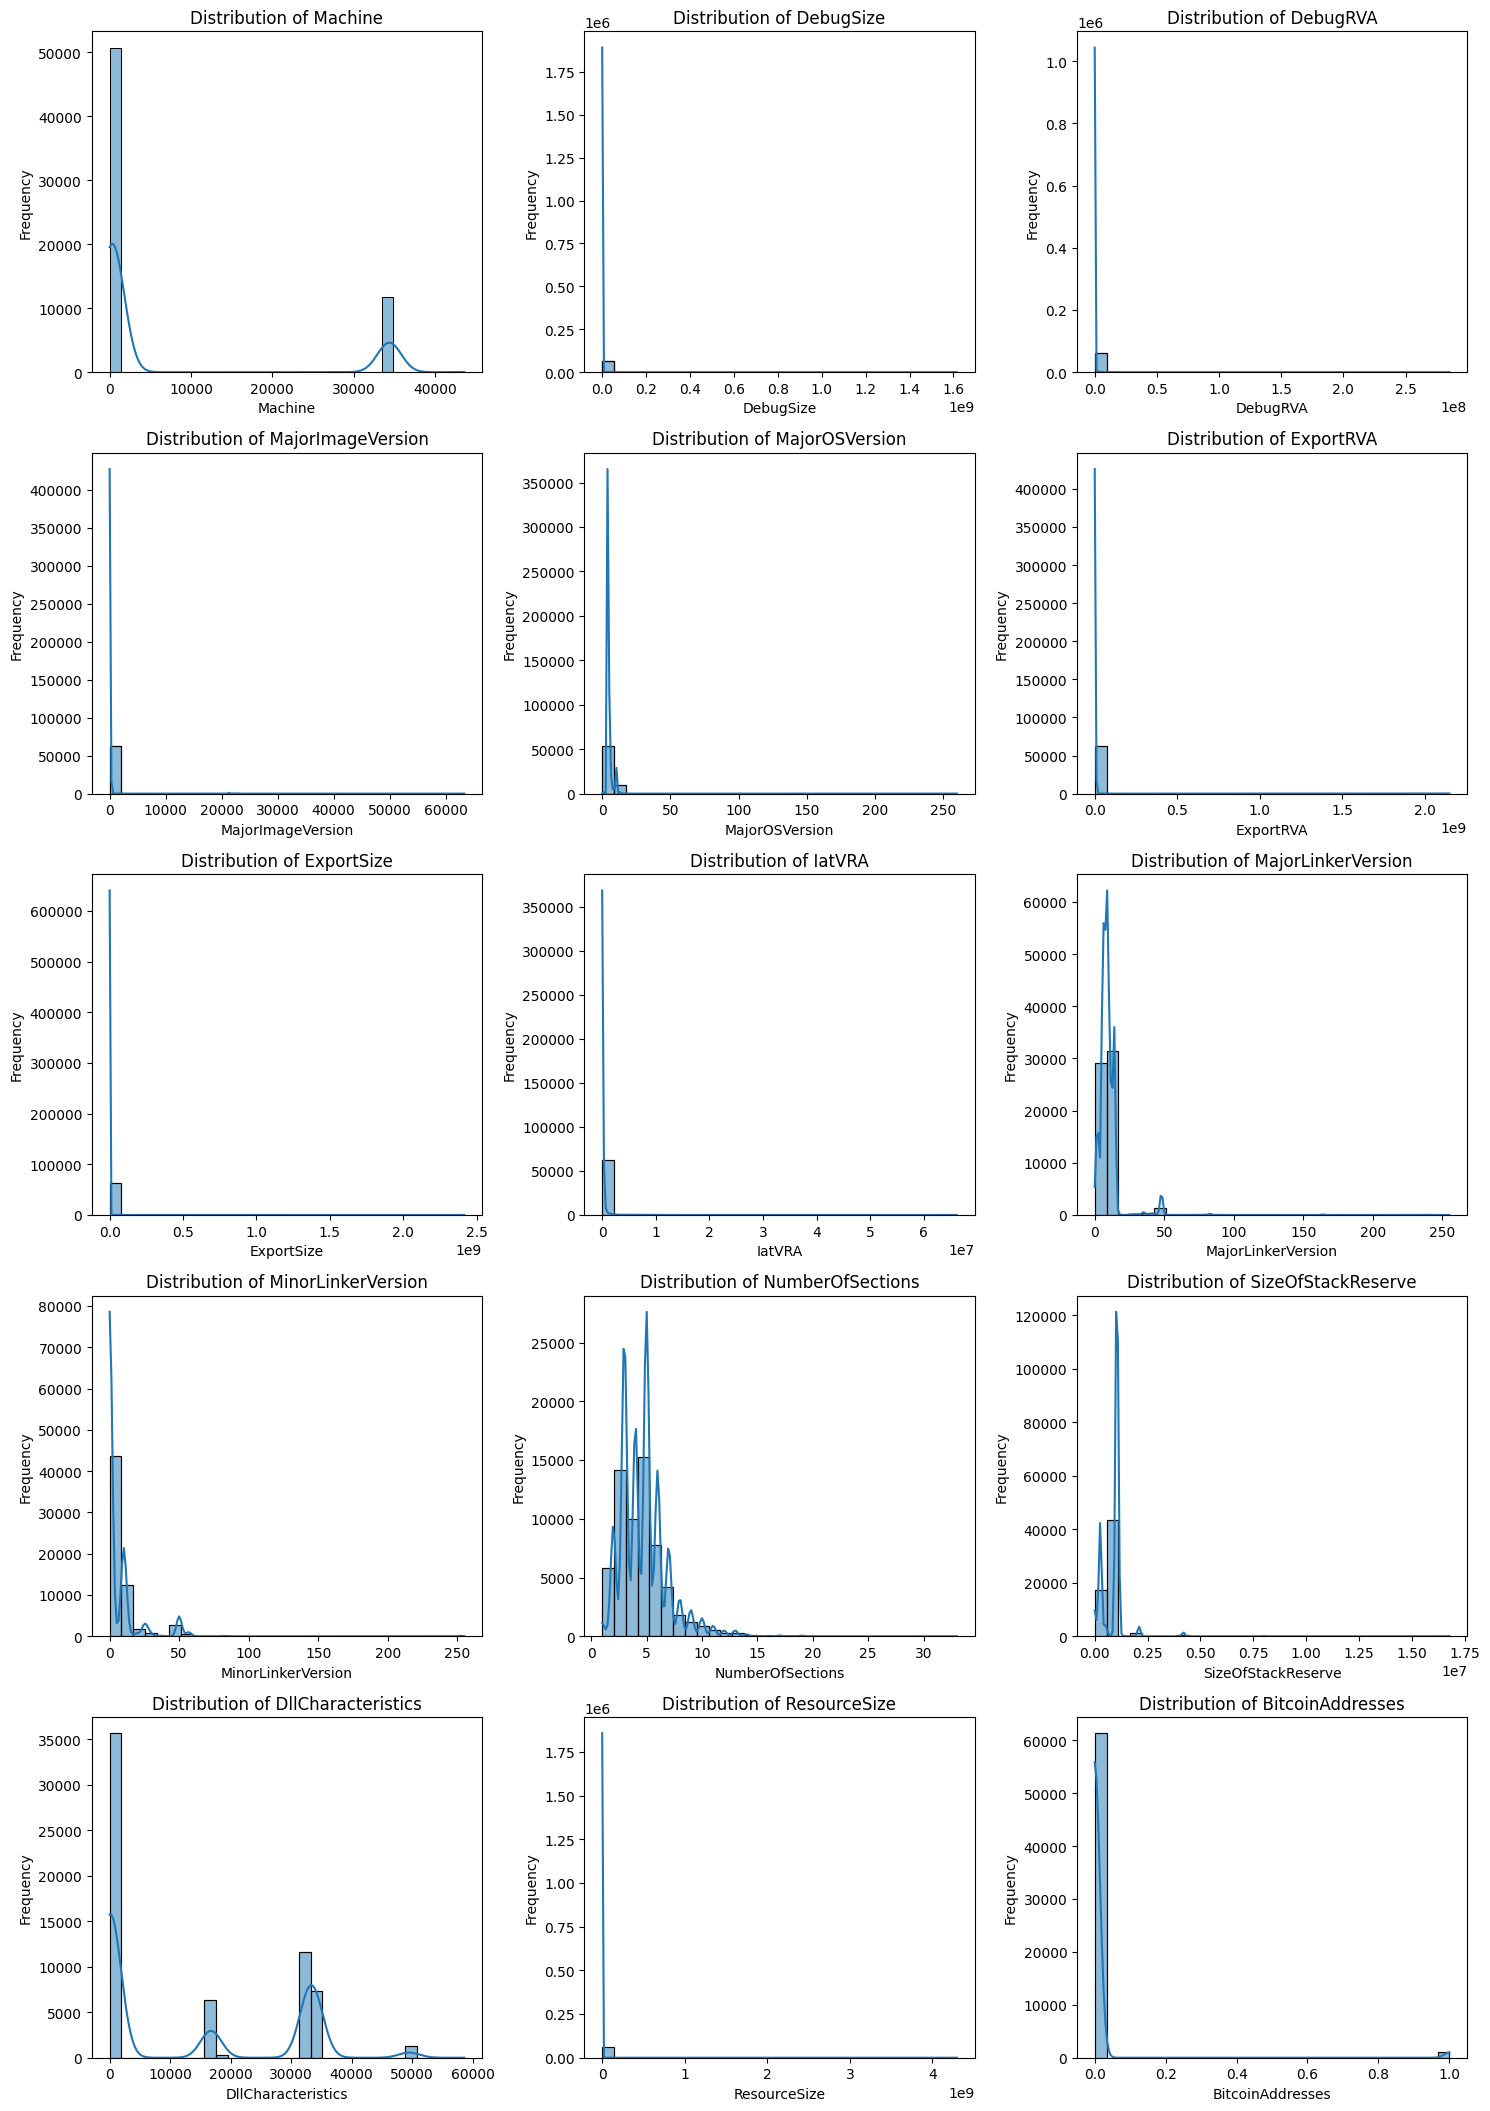

In [14]:
# Plotting histograms for key numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Benign' which is the target variable
if 'Benign' in numerical_features:
    numerical_features.remove('Benign')
plt.figure(figsize=(15, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

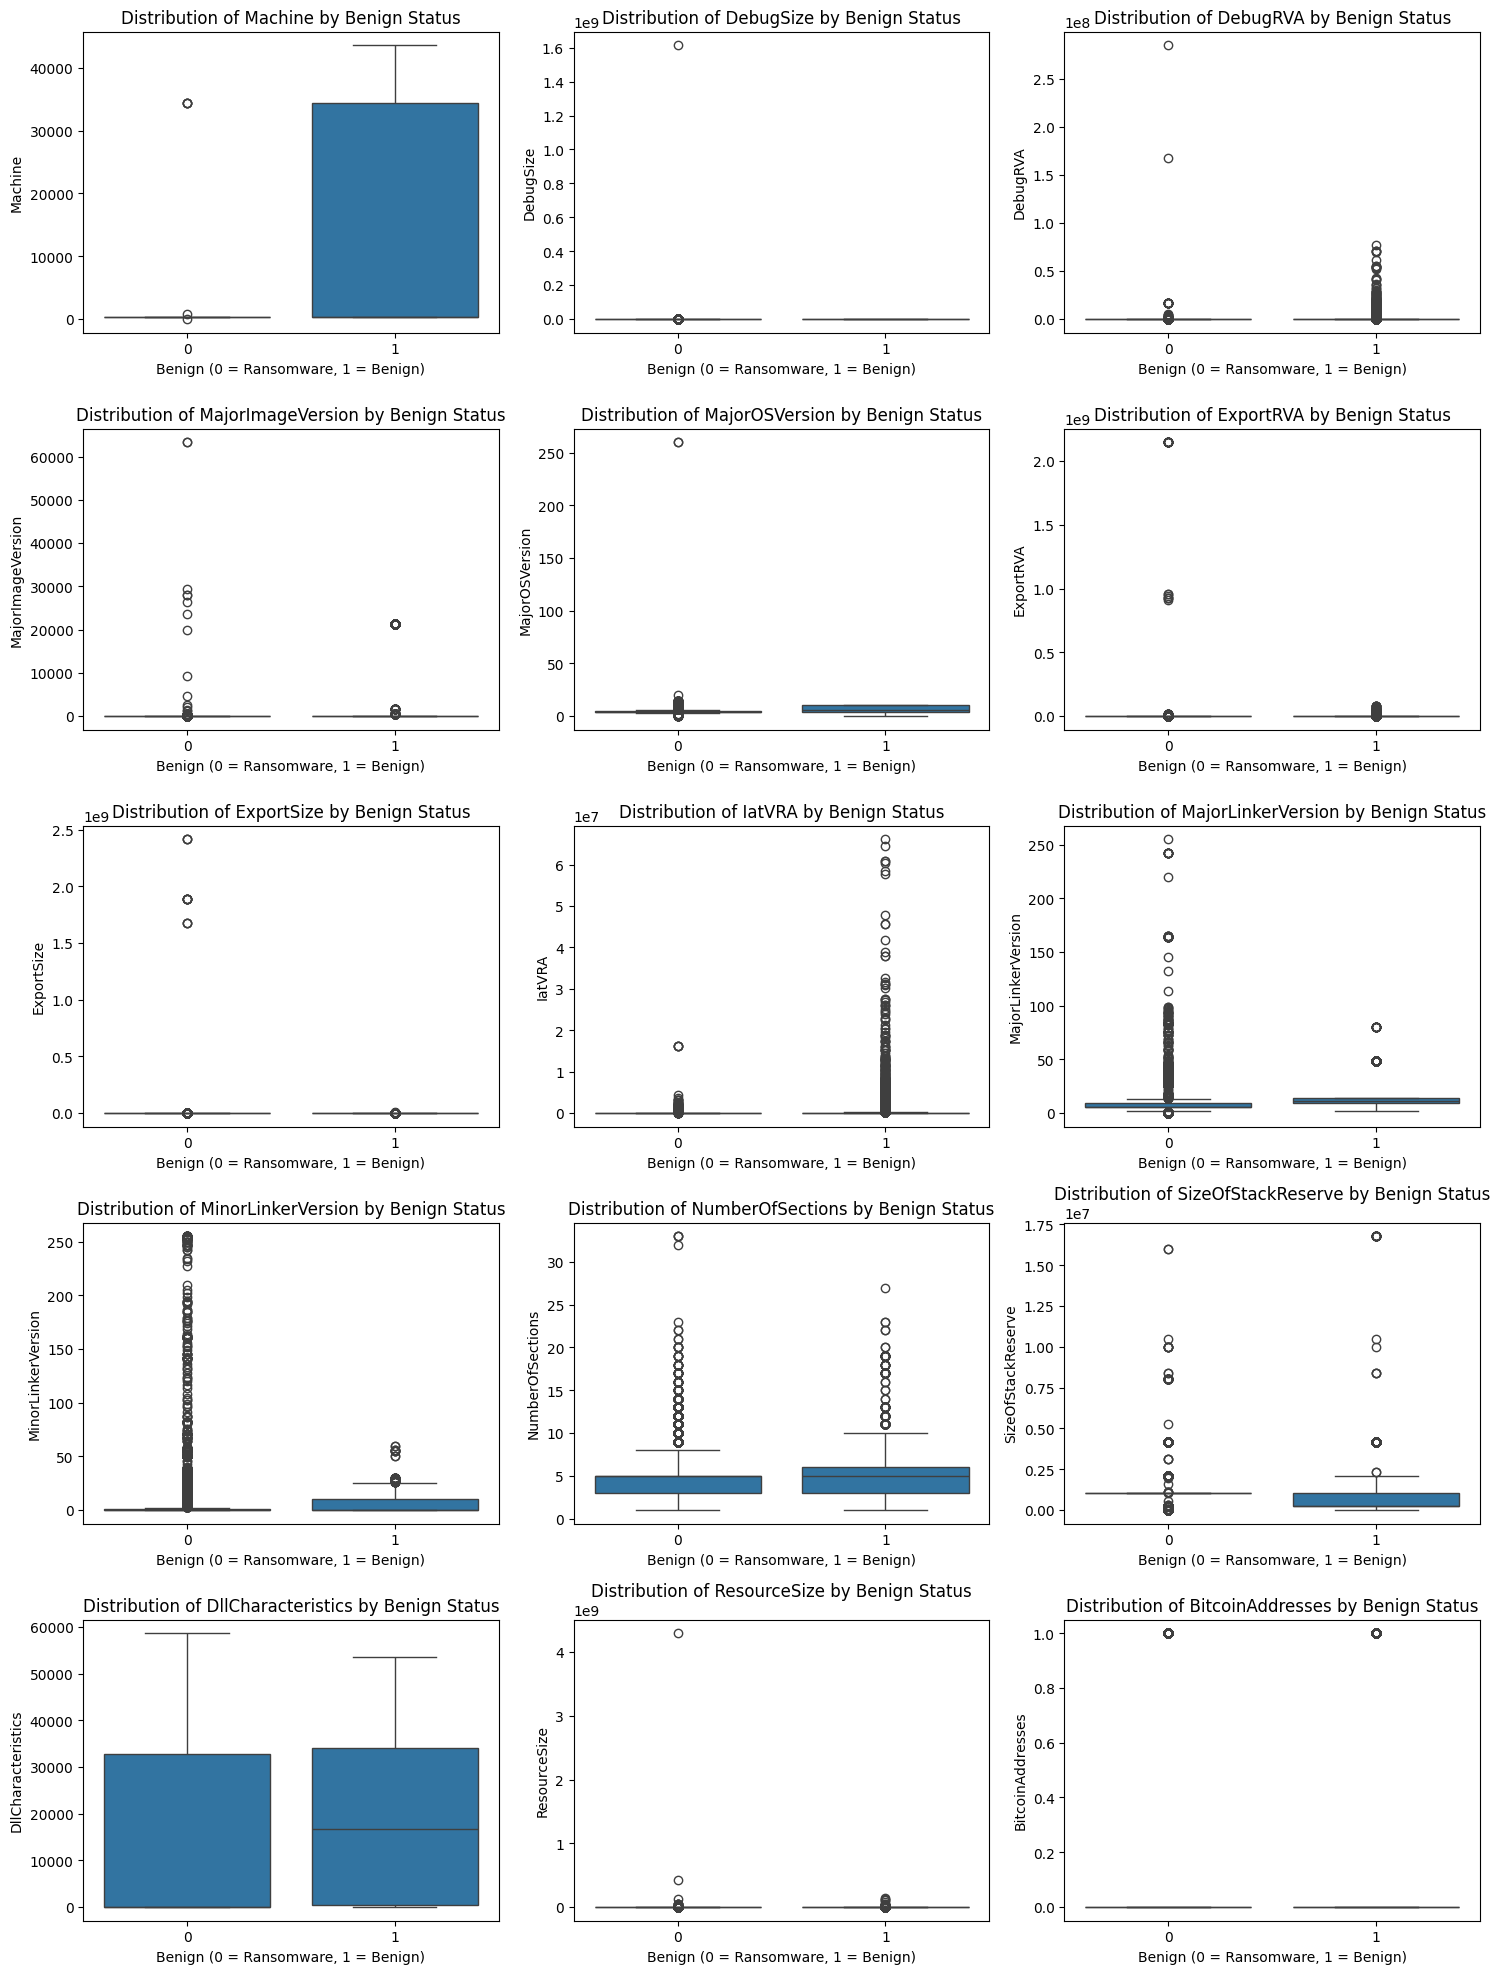

In [15]:
# Visualising the relationship between numerical features and the 'Benign'
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Benign' in numerical_features:
    numerical_features.remove('Benign')

# Determine the number of rows and columns for the subplot grid
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 5, num_rows * 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Benign', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Benign Status')
    plt.xlabel('Benign (0 = Ransomware, 1 = Benign)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [16]:
# Choosing features that showed some interesting distributions or correlations
selected_features = ['MajorImageVersion', 'MajorOSVersion', 'NumberOfSections', 'ResourceSize', 'DllCharacteristics', 'Benign']

In [17]:
# Ensuring all selected features are in the DataFrame
existing_features = [f for f in selected_features if f in df.columns]
if len(existing_features) < len(selected_features):
    print("Warning: Some selected features were not found in the DataFrame.")
    print(f"Using existing features: {existing_features}")

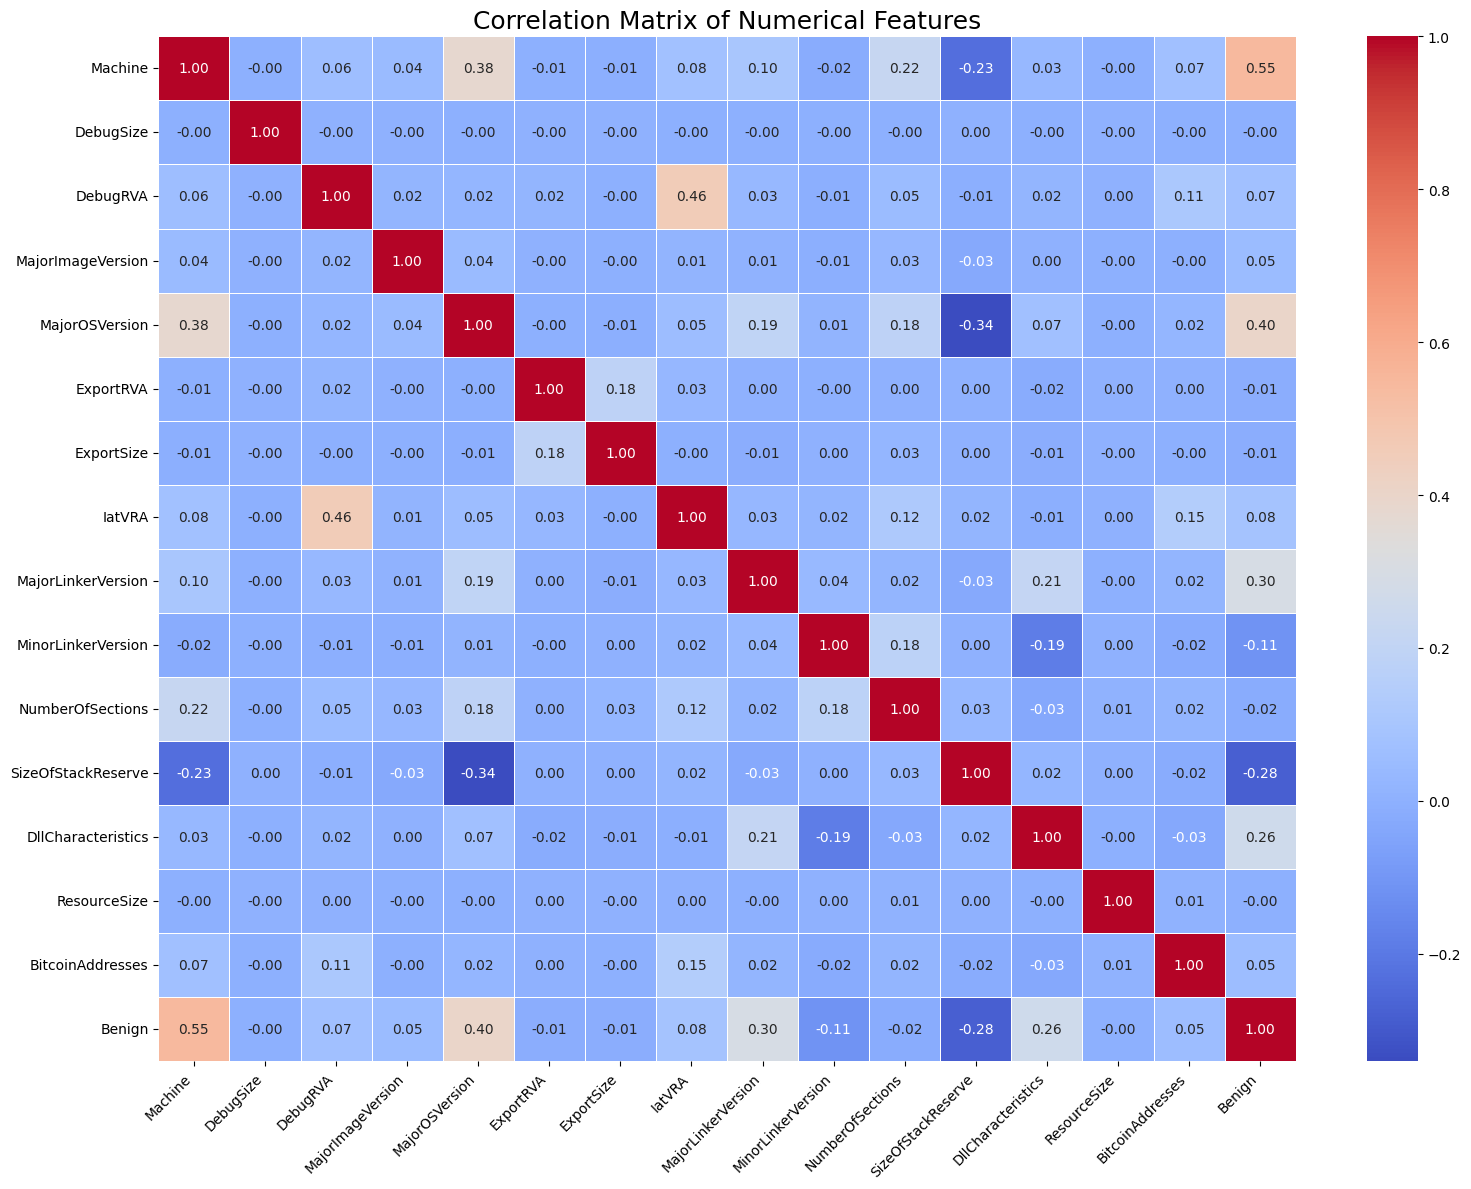

In [18]:
# Visualize the correlation matrix of numerical features
numerical_features_with_benign = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_features_with_benign].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# Separate features (X) and target (y) and exclude 'FileName' and 'md5Hash'
X = df.drop(columns=['Benign', 'FileName', 'md5Hash'])
y = df['Benign']

In [20]:
# Identify numerical features for scaling
numerical_features = X.select_dtypes(include=np.number).columns

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Initialize a StandardScaler object
scaler = StandardScaler()

In [23]:
# Fitting the StandardScaler on the training features (X_train) and transform them
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

In [24]:
# Transform the testing features (X_test) using the fitted StandardScaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [25]:
# Printing the shape of the subsets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (49988, 15)
X_test shape: (12497, 15)
y_train shape: (49988,)
y_test shape: (12497,)


In [26]:
# Initialize a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

In [27]:
# Training the RandomForestClassifier using the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Performing predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)

In [29]:
# Calculating and printing the Random Forest Classifier Performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")
print(f"Random Forest Classifier Precision: {precision:.4f}")
print(f"Random Forest Classifier Recall: {recall:.4f}")
print(f"Random Forest Classifier F1-Score: {f1:.4f}")

Random Forest Classifier Accuracy: 0.9965
Random Forest Classifier Precision: 0.9967
Random Forest Classifier Recall: 0.9952
Random Forest Classifier F1-Score: 0.9959


In [30]:
# Generating and print the classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      1.00      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



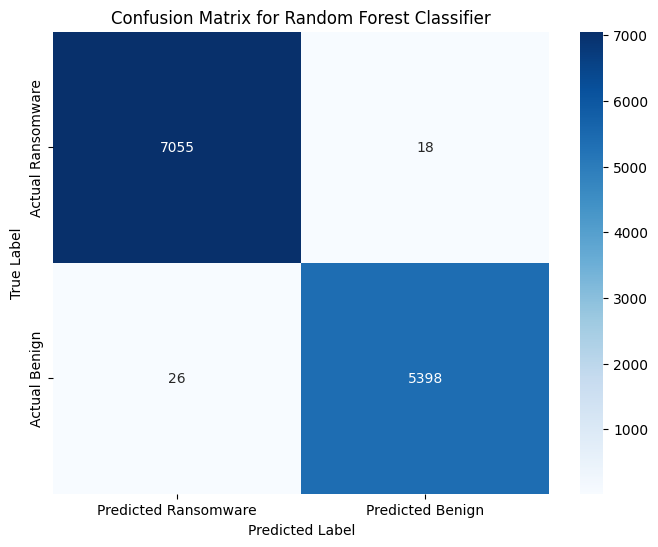

In [31]:
# Computing the confusion matrix of Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ransomware', 'Predicted Benign'],
            yticklabels=['Actual Ransomware', 'Actual Benign'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
# Initialising an XGBClassifier model
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [33]:
# Training the XGBoost Classifier using the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
# Making predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

In [35]:
# Calculate and print the XGBoost Classifier Performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Classifier Precision: {precision_xgb:.4f}")
print(f"XGBoost Classifier Recall: {recall_xgb:.4f}")
print(f"XGBoost Classifier F1-Score: {f1_xgb:.4f}")

XGBoost Classifier Accuracy: 0.9961
XGBoost Classifier Precision: 0.9961
XGBoost Classifier Recall: 0.9948
XGBoost Classifier F1-Score: 0.9955


In [36]:
# Generating and print the classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7073
           1       1.00      0.99      1.00      5424

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



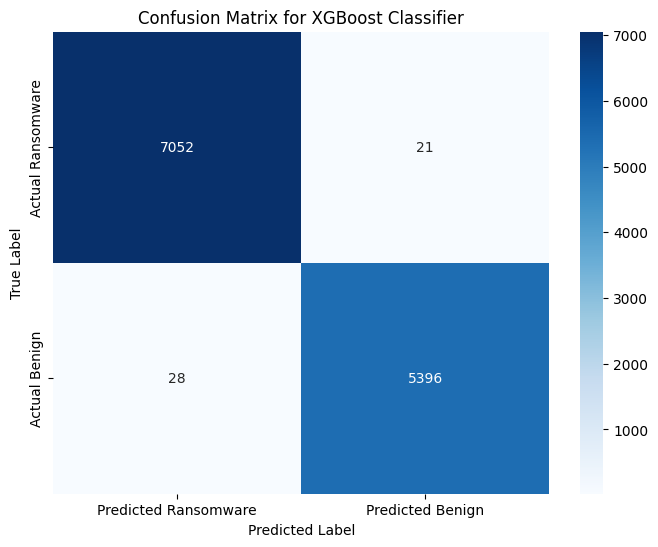

In [37]:
# Calculating the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ransomware', 'Predicted Benign'],
            yticklabels=['Actual Ransomware', 'Actual Benign'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
# Initialize an SVC model
svm_classifier = SVC(random_state=42)

In [39]:
# Train the SVM classifier using the training data
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
# Making predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

In [41]:
# Calculate and print the SVM Classifier Performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"VM Classifier Accuracy: {accuracy_svm:.4f}")
print(f"VM Classifier Precision: {precision_svm:.4f}")
print(f"VM Classifier Recall: {recall_svm:.4f}")
print(f"VM Classifier F1-Score: {f1_svm:.4f}")

VM Classifier Accuracy: 0.9770
VM Classifier Precision: 0.9777
VM Classifier Recall: 0.9690
VM Classifier F1-Score: 0.9733


In [42]:
# Generating and print the classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7073
           1       0.98      0.97      0.97      5424

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497



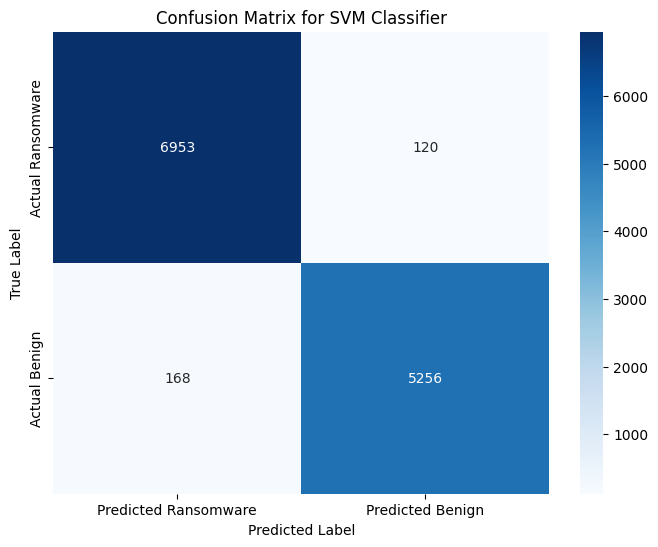

In [43]:
# Computing the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ransomware', 'Predicted Benign'],
            yticklabels=['Actual Ransomware', 'Actual Benign'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# Initialize an MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, activation='relu', solver='adam')

In [45]:
# Training the MLPClassifier using the training data
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [46]:
# Making predictions on the testing set
y_pred_mlp = mlp_classifier.predict(X_test)

In [47]:
# Calculate and print the ANN Classifier Performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
print(f"ANN Classifier Accuracy: {accuracy_mlp:.4f}")
print(f"ANN Classifier Precision: {precision_mlp:.4f}")
print(f"ANN Classifier Recall: {recall_mlp:.4f}")
print(f"ANN Classifier F1-Score: {f1_mlp:.4f}")

ANN Classifier Accuracy: 0.9882
ANN Classifier Precision: 0.9873
ANN Classifier Recall: 0.9856
ANN Classifier F1-Score: 0.9864


In [48]:
# Generate and print the classification_report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7073
           1       0.99      0.99      0.99      5424

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



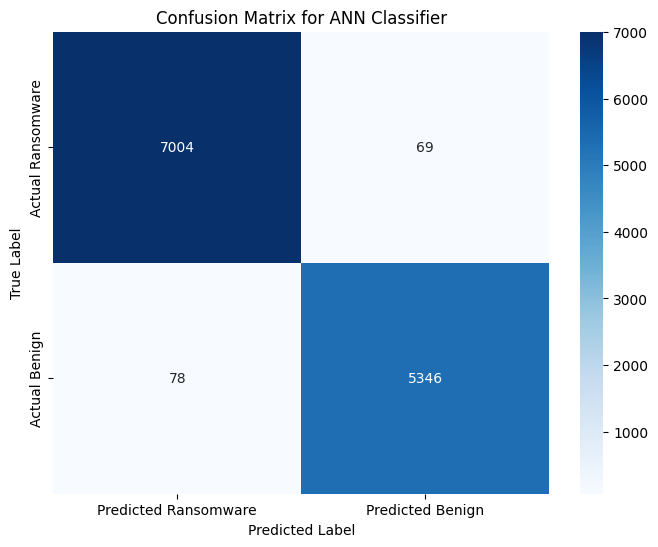

In [49]:
# Computing the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Ransomware', 'Predicted Benign'],
            yticklabels=['Actual Ransomware', 'Actual Benign'])
plt.title('Confusion Matrix for ANN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

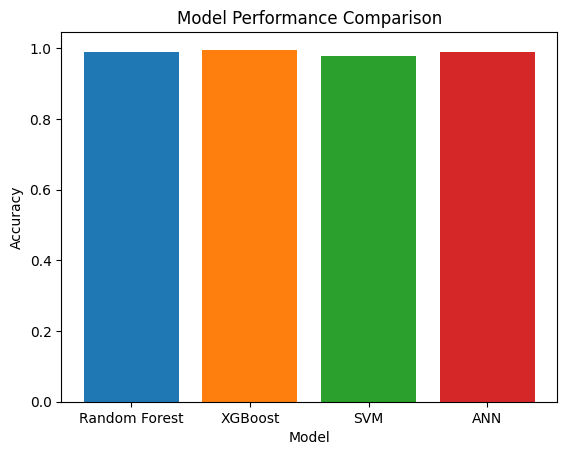

In [51]:
# Visualise the performance of all implemented models
models = ['Random Forest', 'XGBoost', 'SVM', 'ANN']
accuracies = [accuracy, accuracy_xgb, accuracy_svm, accuracy_mlp]
for model, accuracy in zip(models, accuracies):
    plt.bar(model, accuracy)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
plt.show()

In [52]:
# Performing the comparison of Real vs predicted values using all models
models = ['Random Forest', 'XGBoost', 'SVM', 'ANN']
real_values = [y_test, y_test, y_test, y_test]
predicted_values = [y_pred_rf, y_pred_xgb, y_pred_svm, y_pred_mlp]
for model, real, predicted in zip(models, real_values, predicted_values):
  print(f"Model: {model}")
  print("Real Values:")
  print(real.value_counts())
  print("Predicted Values:")
  print(pd.Series(predicted).value_counts())

Model: Random Forest
Real Values:
Benign
0    7073
1    5424
Name: count, dtype: int64
Predicted Values:
0    7081
1    5416
Name: count, dtype: int64
Model: XGBoost
Real Values:
Benign
0    7073
1    5424
Name: count, dtype: int64
Predicted Values:
0    7080
1    5417
Name: count, dtype: int64
Model: SVM
Real Values:
Benign
0    7073
1    5424
Name: count, dtype: int64
Predicted Values:
0    7121
1    5376
Name: count, dtype: int64
Model: ANN
Real Values:
Benign
0    7073
1    5424
Name: count, dtype: int64
Predicted Values:
0    7082
1    5415
Name: count, dtype: int64
